# Python for Data Analytics

## ***Task 1*** *(Load your data)*

- `data/afl/stats.csv"
- `data/afl/players.csv"
- `data/afl/games.csv"

Take your data from the three files above. ✅

Load your data into a ***single*** dataframe by merging the three data sets. ✅

***Marking Criteria:*** *Your data is loaded into a single pandas dataframe that contains all the data from the original files merged together. Your notebook runs without error.* ***(10%)***

In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


# import assignment datasets
stats = pd.read_csv('/workspace/IATD-Python-Data/data/afl/stats.csv')
players = pd.read_csv('/workspace/IATD-Python-Data/data/afl/players.csv')
games = pd.read_csv('/workspace/IATD-Python-Data/data/afl/games.csv')


# join datasets together into a single dataframe
df = stats.merge(players, on='playerId', how='left').merge(games, on='gameId', how='left')


# transform dataframe header names
df = df.rename(columns={"year_x": "Year", "displayName_x": "Player"})


# add feature summarisation
df["Finals"] = df['round_x'].apply(lambda x: "Yes" if x[-1] == 'F' else "No")


# create boolean PLAYERS mask
Franklin_Lance  = df["Player"].apply(lambda x: x == 'Franklin, Lance')         #Task2 & #Task3
Franklin = df[Franklin_Lance]
Papley_Tom      = df["Player"].apply(lambda x: x == 'Papley, Tom')                      #Task3
Papley = df[Papley_Tom]
Mumford_Shane   = df["Player"].apply(lambda x: x == 'Mumford, Shane')                   #Task3
Mumford = df[Mumford_Shane]
Hooker_Cale     = df["Player"].apply(lambda x: x == 'Hooker, Cale')                     #Task3
Hooker = df[Hooker_Cale]

# where series values are true, the index # relates to that PLAYER
# THEN create a shorten reference variable for each player
# eg. Fraklin returns only the related dataframe rows



### ***Dataset*** *(notes, exploration, findings)*

* ('EF', 'Elimination Finals',  4): The first week of finals where the teams placed 5th to 8th compete.
* ('PF', 'Preliminary Finals',  2): The second week of finals where the losers of EF are eliminated and winners proceed.
* ('QF', 'Qualifying Finals',   4): The first week of finals where the teams placed 1st to 4th compete.
* ('SF', 'Semi-Finals',         4): The third week of finals where the winners of QF and SF compete.
* ('GF', 'Grand Final',         2): The final and deciding game of the AFL season, where the winners of PF compete for the championship.

#### ***Assumptions*** *below will be treated as factual for this assignment*

* ['round_x'] appears to contain data identifying matches as either round matches (R%) or final matches (%F). 

## ***Task 2*** *(Plot one player)*

- For a particular player - say "Franklin, Lance" - plot their accumlation of goals over time.

- The x-axis should be the number of games played and the y-axis should be the number of goals accumulated.

- Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.

***Marking Criteria:*** *Your notebook includes a chart of Lance Franklin’s goals drawn from the example data. The chart should accurately represent the progression of Lance Franklin’s goals over the data set period. Your analysis should include an enlightening explanation in Markdown blocks.* ***(30%)***

In [5]:
# test code for review
    # multi-mask
df[(Franklin_Lance) & (Finals)]['Goals'].mean()





NameError: name 'Finals' is not defined

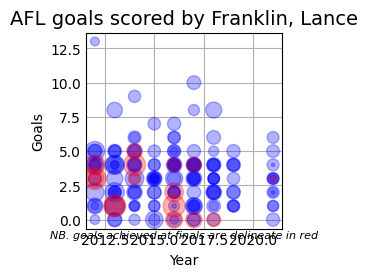

In [ ]:
# plot
plt.scatter(  Franklin['Year']
            , Franklin['Goals']
            , alpha=0.3
            , c=Franklin['round_x'].apply(lambda x: "red" if x[-1] == 'F' else "blue")
            , s=Franklin['attendance'].apply(lambda x: (x^2)/400)
            # , cmap='plasma'
            )


# label
plt.xlabel('Year')
plt.ylabel('Goals')
plt.title('AFL goals scored by Franklin, Lance', fontsize=14)
plt.suptitle('NB. goals achieved at finals are delineate in red', y=0.0, fontsize=8, style='italic')
plt.show();



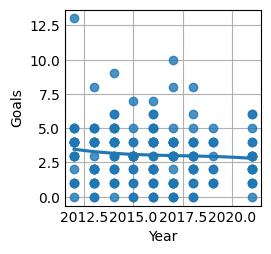

In [ ]:
# create scatterplot with regression line
sns.regplot(Franklin, x='Year', y='Goals', order=3, ci=None)
plt.show()



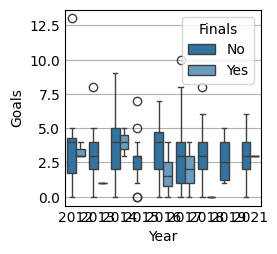

<Figure size 1000x600 with 0 Axes>

In [ ]:
# plot
sns.boxplot(data=Franklin, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()



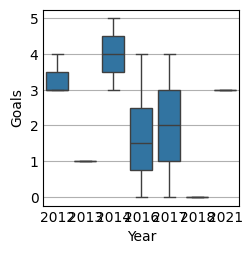

<Figure size 1000x600 with 0 Axes>

In [ ]:
# plot
tmp = Franklin.query("Finals == 'Yes'")
sns.boxplot(data=tmp, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()



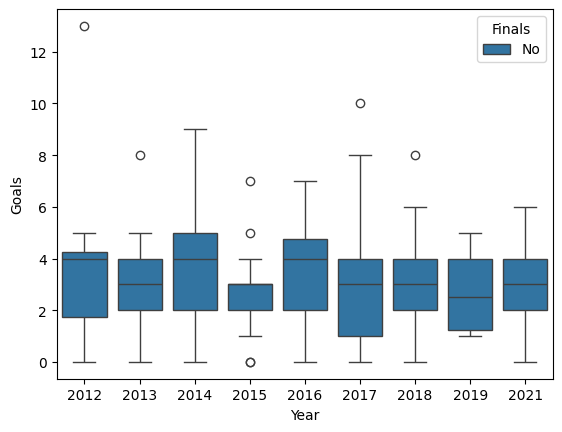

<Figure size 1000x600 with 0 Axes>

In [6]:
# plot
tmp = Franklin.query("Finals == 'No'")
sns.boxplot(data=tmp, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()



In [7]:
# sns.distplot(Franklin['Year'])
# sns.distplot(Franklin['Goals']);

# sns.kdeplot(Franklin[["Goals"]]);

sns.pairplot(Franklin, hue='Finals', height=2.5);

In [ ]:
# !curl -O 
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')



def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})



data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9



with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')



data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']




sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");




g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();





In [ ]:
planets = sns.load_dataset('planets')
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

In [ ]:
tips = sns.load_dataset('tips')

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## ***Task 3*** *(Plot multiple players)*

In the one chart, plot the lines for the following players:

•	"Franklin, Lance"

•	"Papley, Tom"

•	"Mumford, Shane"

•	"Hooker, Cale"

Plot each in a different colour so they can be distinguished and add a legend.

***Marking Criteria:*** *Your notebook includes a chart of the four named player’s goals drawn from the example data. The chart should accurately represent the underlying data and be easy to interpret.  Your analysis should include an enlightening explanation in Markdown blocks.* ***(30%)***

## ***Task 4*** *(Linear Regression)*

- Create a second plot showing just "Franklin, Lance" and "Hooker, Cale" but include the linear regression line for each.

- In other words, as well as showing their actual cummulative goals over time, plot their predicted goals over time where the prediction is done via Linear Regression.

- Be sure to use different colours for each line and include a legend.

***Marking Criteria:*** *Your notebook includes a single chart showing the goal progression and the best fit linear regression line for the two named players. It must be easy for the reader to distinguish the data presented on the chart and interpret it with help from explanatory Markdown blocks.* ***(30%)***

## Tips

**Note:** There is a quirk in this data:

- Because it only starts at 2012, there are **many players who start the dataset with more than one game already played**.

    - That is why you will see **some players have 0 goals at game number 200**.

    - It is not that they kicked no goals for 250 games, it is that those **games are not included in the dataset**.

- It is up to you to choose how to organise your analysis to account for this.

- In other words, how can you make your visualisation work given this quirk?

**Hint:** you might find the `reset_index` method useful.